<h1>Original image, 720x1280 resized into 224x224</h1>


In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history

Using TensorFlow backend.


<h1>With data augmentation and regularization</h1>

In [3]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'

In [4]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 446 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))    # 32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))                               # 64
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #  3D activation map -> 1D vector
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, epsilon=10e-8),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
__________

In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=446 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=150 // batch_size)

Epoch 1/100
13/13 [==============================] - 7s 567ms/step - loss: 4.9781 - acc: 0.3317 - val_loss: 1.0536 - val_acc: 0.4531
Epoch 2/100
13/13 [==============================] - 11s 862ms/step - loss: 1.0995 - acc: 0.3615 - val_loss: 1.0025 - val_acc: 0.4661
Epoch 3/100
13/13 [==============================] - 9s 691ms/step - loss: 0.9638 - acc: 0.5365 - val_loss: 0.7077 - val_acc: 0.6695
Epoch 4/100
13/13 [==============================] - 9s 699ms/step - loss: 0.6850 - acc: 0.6354 - val_loss: 0.5202 - val_acc: 0.7542
Epoch 5/100
13/13 [==============================] - 9s 677ms/step - loss: 0.6356 - acc: 0.6698 - val_loss: 0.5049 - val_acc: 0.7034
Epoch 6/100
13/13 [==============================] - 8s 638ms/step - loss: 0.6000 - acc: 0.6875 - val_loss: 0.5044 - val_acc: 0.7031
Epoch 7/100
13/13 [==============================] - 8s 618ms/step - loss: 0.5572 - acc: 0.6783 - val_loss: 0.4105 - val_acc: 0.8644
Epoch 8/100
13/13 [==============================] - 8s 592ms/step -

In [12]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 1ms/step


[2.612807273864746, 0.8125]

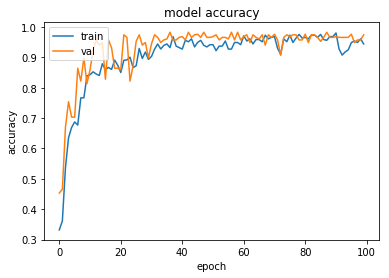

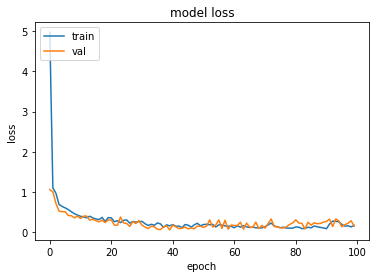

In [11]:
plot_history(history, save=True, path='plots/overfit/', name='overfitWReg')

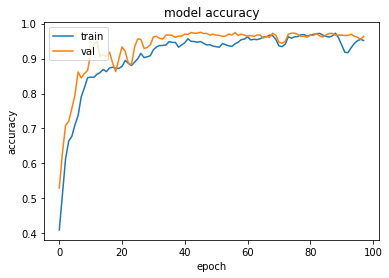

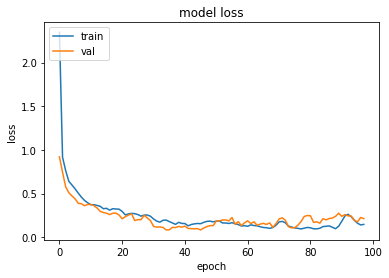

In [13]:
plot_history(history, mean_N=3, save=True, path='plots/overfit/', name='overfitWRegMovMean3')

<h1>Without data augmentation and Regularization</h1>

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history

Using TensorFlow backend.


In [2]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'

In [3]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255
)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 446 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))    # 32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))                               # 64
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #  3D activation map -> 1D vector
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, epsilon=10e-8),
              metrics=['accuracy'])

#model.summary()

In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=446 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=150 // batch_size)

Epoch 1/100
13/13 [==============================] - 5s 358ms/step - loss: 1.8040 - acc: 0.3288 - val_loss: 1.1165 - val_acc: 0.2109
Epoch 2/100
13/13 [==============================] - 5s 393ms/step - loss: 1.0910 - acc: 0.3457 - val_loss: 1.0347 - val_acc: 0.6017
Epoch 3/100
13/13 [==============================] - 4s 338ms/step - loss: 1.0100 - acc: 0.4663 - val_loss: 0.8951 - val_acc: 0.7203
Epoch 4/100
13/13 [==============================] - 4s 314ms/step - loss: 0.8178 - acc: 0.5422 - val_loss: 0.6584 - val_acc: 0.7119
Epoch 5/100
13/13 [==============================] - 4s 307ms/step - loss: 0.7240 - acc: 0.6178 - val_loss: 0.6586 - val_acc: 0.6525
Epoch 6/100
13/13 [==============================] - 4s 338ms/step - loss: 0.7061 - acc: 0.6406 - val_loss: 0.6299 - val_acc: 0.6875
Epoch 7/100
13/13 [==============================] - 5s 407ms/step - loss: 0.6984 - acc: 0.6333 - val_loss: 0.6865 - val_acc: 0.6525
Epoch 8/100
13/13 [==============================] - 4s 311ms/step - 

In [16]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 1ms/step


[2.1091160774230957, 0.84375]

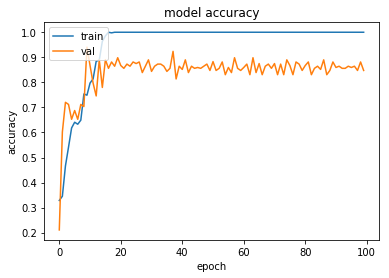

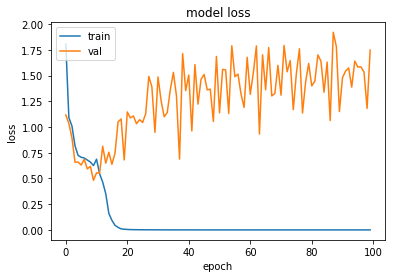

In [10]:
plot_history(history, save=True, path='plots/overfit/', name='overfit')

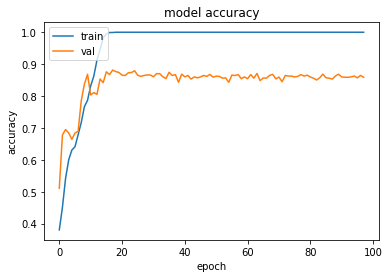

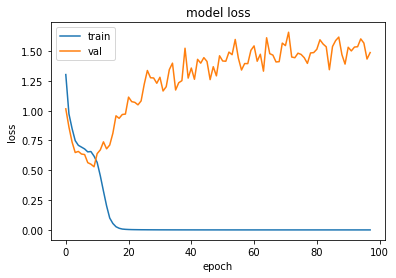

In [9]:
plot_history(history, mean_N=3, save=True, path='plots/overfit/', name='overfitMovMean3')